# Графики по парниковым газам

Построение графиков зависимости объемов выбросов метана и углекислого газа от географической широты и долготы места отбора проб. Данные получены на основе анализа научных статей соответствующей тематики и оформлены в таблицу.

## Предобработка данных

In [1]:
import pandas as pd
import os
from matplotlib import pyplot as plt
import numpy as np
import scipy.stats as st
import math as mth
import seaborn as sns

pd.set_option('display.max_colwidth', None)

In [2]:
def initial_analysis(df):
    df.info(),
    display(df.head(10)),
    display(df.describe())

In [3]:
df = pd.read_excel(r'C:\Data\Расчет накопления ПГ\Fluxes.xlsx', index_col=False)

In [4]:
initial_analysis(df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24 entries, 0 to 23
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Reference  24 non-null     object 
 1   Ecoreg     24 non-null     object 
 2   x_coord    24 non-null     float64
 3   y_coord    24 non-null     float64
 4   CH4 max    18 non-null     float64
 5   CH4 min    18 non-null     float64
 6   CH4        19 non-null     float64
 7   CO2 max    9 non-null      float64
 8   CO2 min    9 non-null      float64
 9   CO2        13 non-null     float64
dtypes: float64(8), object(2)
memory usage: 2.0+ KB


,Reference,Ecoreg,x_coord,y_coord,CH4 max,CH4 min,CH4,CO2 max,CO2 min,CO2
0,"Abnizova et al., 2012",Среднесибирская тундра,126.466667,72.366667,NaN,NaN,NaN,350.0,350.0,1750.0
1,"Dean et al., 2020",Северо-Якутская тундра,147.490000,70.830000,7.0,7.0,21.0,232.0,232.0,290.0
2,"Desyatkin et al., 2009",Восточно-Сибирская тайга,130.566667,62.183333,31.0,31.0,41.0,NaN,NaN,NaN
3,"Galchenko et al., 2001",Западно-Сибирская тайга,78.128611,64.861389,0.3,0.3,2.6,NaN,NaN,NaN
4,"Golubyatnikov et al., 2013",Ямало-Гыданская тундра,78.533333,70.900000,5.8,5.8,7.0,NaN,NaN,NaN
5,"Golubyatnikov et al., 2013",Ямало-Гыданская тундра,79.016667,67.583333,5.9,5.9,7.7,NaN,NaN,NaN
6,"Golubyatnikov et al., 2013",Ямало-Гыданская тундра,78.916667,67.183333,25.2,25.2,26.3,NaN,NaN,NaN
7,Lara Hughes-Allen et al. 2021,Восточно-Сибирская тайга,130.982000,62.554000,20.0,14.0,18.0,161.0,163.0,163.0
8,"Marushchak et al., 2013",Большеземельская тундра,62.933333,67.049985,NaN,NaN,NaN,375.0,375.0,625.0
9,Morishita et al. 2003,Восточно-Сибирская тайга,129.500000,62.316667,21.0,21.0,36.0,NaN,NaN,NaN


,x_coord,y_coord,CH4 max,CH4 min,CH4,CO2 max,CO2 min,CO2
count,24.000000,24.000000,18.000000,18.000000,19.000000,9.000000,9.000000,13.000000
mean,94.835827,66.258839,11.211111,8.650000,19.234737,288.000000,240.222222,810.692308
std,35.660329,3.311428,11.495364,8.779806,18.375105,203.200025,157.546642,583.718452
min,53.880813,60.894238,0.300000,0.200000,2.400000,22.000000,22.000000,133.000000
25%,72.788548,63.491716,3.950000,2.700000,6.180000,161.000000,162.000000,405.000000
50%,78.528181,67.116659,6.000000,5.850000,14.000000,306.000000,232.000000,625.000000
75%,129.766667,67.887043,18.050000,9.650000,23.650000,375.000000,375.000000,1317.000000
max,161.300000,72.366667,40.000000,31.000000,70.000000,648.000000,424.000000,1830.000000


## Построение графиков

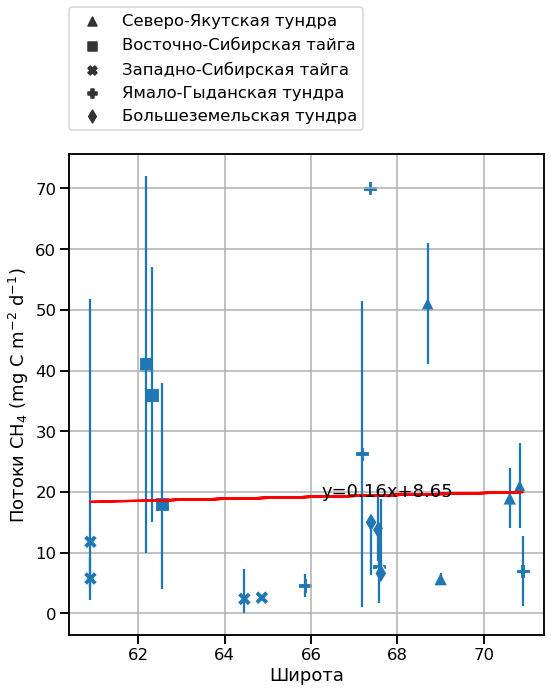

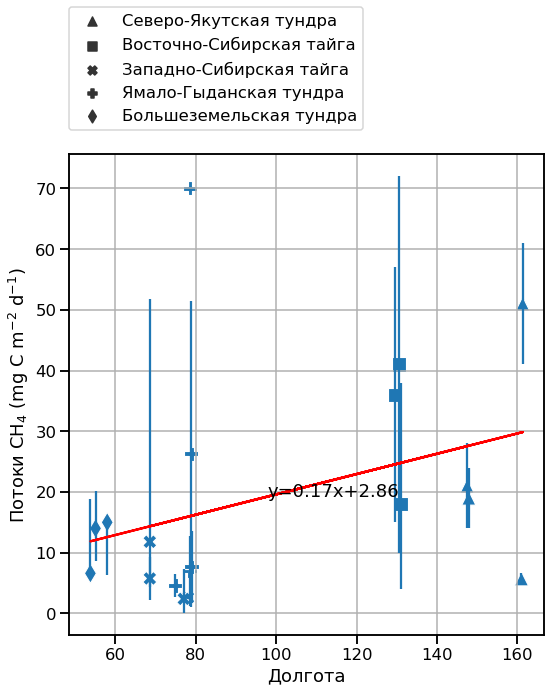

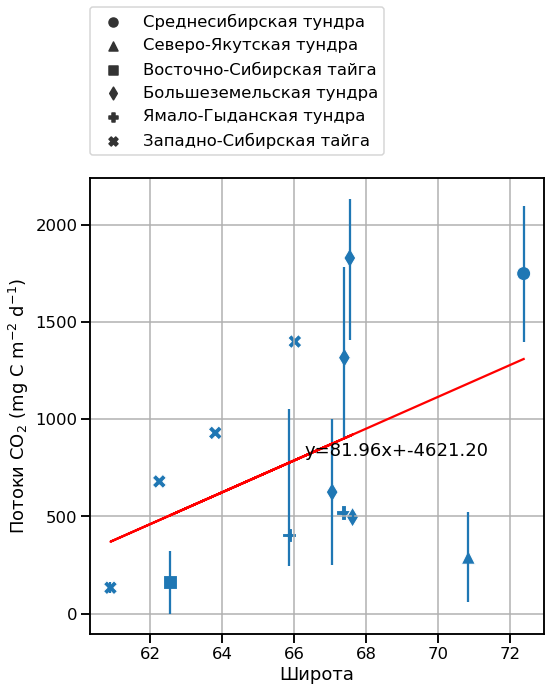

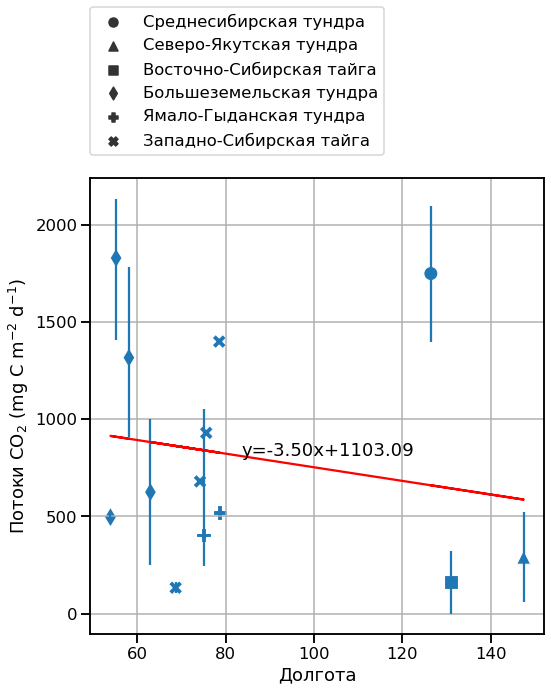

In [30]:
sns.set_context('talk')

# задаем стили для экорегионов
ecoreg_styles = {
    'Среднесибирская тундра': 'o',
    'Северо-Якутская тундра': '^',
    'Восточно-Сибирская тайга': 's',
    'Большеземельская тундра': 'd',
    'Западно-Сибирская тайга': 'X',
    'Ямало-Гыданская тундра': 'P'
}

for i in ['CH4', 'CO2']:
    data = df.dropna(subset=[i])
    
# графики по широте    
    plt.figure(figsize=(8, 10))
    sns.scatterplot(x='y_coord', y=i, style='Ecoreg', markers=ecoreg_styles, data=data, s=200)

    #error bar
    lower_error = data[f'{i} min']
    upper_error = data[f'{i} max']
    asymmetric_error = [lower_error, upper_error]
    plt.errorbar(x=data['y_coord'], y=data[i], yerr=asymmetric_error, fmt='none')

    #regression part
    x = data['y_coord']
    y = data[i]
    
    slope, intercept, r_value, p_value, std_err = st.linregress(x,y)

    line = slope*x+intercept
    plt.plot(x, line, 'r')
    
    text_x = x.mean()  # координата x для текста
    text_y = slope * text_x + intercept  # координата y, соответствующая линии регрессии
    plt.text(text_x, text_y, f'y={slope:.2f}x+{intercept:.2f}')

#   plt.title(f'Зависимость потоков {i} от широты')
    plt.xlabel('Широта')
    if i == 'CH4':
        plt.ylabel('Потоки CH$_4$ (mg C m$^{-2}$ d$^{-1}$)')
    else:
        plt.ylabel('Потоки CO$_2$ (mg C m$^{-2}$ d$^{-1}$)')
    plt.legend(bbox_to_anchor=(0, 1.05), loc='lower left', borderaxespad=0.)
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
# графики по долготе
    plt.figure(figsize=(8, 10))
    sns.scatterplot(x='x_coord', y=i, style='Ecoreg', markers=ecoreg_styles, data=data, s=200)

    #error bar
    lower_error = data[f'{i} min']
    upper_error = data[f'{i} max']
    asymmetric_error = [lower_error, upper_error]
    plt.errorbar(x=data['x_coord'], y=data[i], yerr=asymmetric_error, fmt='none')

    #regression part
    x = data['x_coord']
    y = data[i]

    slope, intercept, r_value, p_value, std_err = st.linregress(x,y)

    line = slope*x+intercept
    plt.plot(x, line, 'r')
    
    text_x = x.mean()  # координата x для текста
    text_y = slope * text_x + intercept  # координата y, соответствующая линии регрессии
    plt.text(text_x, text_y, f'y={slope:.2f}x+{intercept:.2f}')

#    plt.title(f'Зависимость выбросов {i} от долготы')
    plt.xlabel('Долгота')
    if i == 'CH4':
        plt.ylabel('Потоки CH$_4$ (mg C m$^{-2}$ d$^{-1}$)')
    else:
        plt.ylabel('Потоки CO$_2$ (mg C m$^{-2}$ d$^{-1}$)')
    plt.legend(bbox_to_anchor=(0, 1.05), loc='lower left', borderaxespad=0.)
    plt.grid(True)
    plt.tight_layout()
    plt.show()